# Ford GoBike System Data Exploration

## by Michael F. H. Georgy

# Table of contents

[1. Loading Libraries](#loading)

[2. Gathering Data](#gathering)
  * [A. Getting Jan 2020 Baywheels-Data zip file](#get_jan)
   
  * [B. Getting Feb 2020 Baywheels-Data zip file](#get_feb)
   
  * [C. Getting March 2020 Baywheels-Data zip file](#get_march)
  
[3. Assessing Data](#assessing)
  * [A. Assesing Jan 2020 Data](#assess_jan)

  * [B. Assesing Feb 2020 Data](#assess_feb)
  
  * [C. Asessing March 2020 Data](#assess_march)

  * [D. Findings](#findings)


[4. Cleaning Data](#cleaning)
  * [A. Creating Dataframe Copies](#copies)

  * [B. Cleaning Tidiness Issues](#tidiness)
  
  * [C. Cleaning Quality Issues](#quality)
  
[5. Storing Data](#storing)

[6. Data Analysis and Visualization](#analysis)
  * [A. Exploratory Data Analysis](#exploratory)
  
       - [i. Univariate Exploration](#univariate)
      
       - [ii. Bivariate Exploration](#bivariate)
      
       - [iii. Multivariate Exploration](#multivariate)

* [B. Explanatory Data Analysis](#explanatory)

<a id='loading'></a>
## 1. Loading Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests
import io

%matplotlib inline

<a id='gathering'></a>
## 2. Gathering Data
Work wil be done on the 3 available 2020 Ford GoBike System (now called Baywheels) data sets (Months: Jan, Feb, and March)

<a id='get_jan'></a>
### A. Getting Jan 2020 Baywheels-Data zip file

In [2]:
# Download the first zip file and read it into a dataframe.

re = requests.get('https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip')
zip_file = zipfile.ZipFile(io.BytesIO(re.content))
csvfile = zip_file.open('202001-baywheels-tripdata.csv')

df = pd.read_csv(csvfile)
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [3]:
df.to_csv('Ford01-2020.csv',index=False) # save to csv file excluding the index column

In [4]:
# Get data type of column 'rental_access_method' (column 13)

print('Data type of column rental_access_method in the Dataframe :')
print(df.dtypes['rental_access_method'])

Data type of column rental_access_method in the Dataframe :
object


In [5]:
# Check Ford01-2020.csv is saved correctly.

df1 = pd.read_csv('Ford01-2020.csv', dtype={'rental_access_method': object}) #Specified dtype to resolve error message
df1.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
295849,890,2020-01-26 16:18:12,2020-01-26 16:33:02,NaN,NaN,37.810492,-122.476752,NaN,NaN,37.786677,-122.466642,353366,Customer,app
295850,1328,2020-01-06 12:40:12,2020-01-06 13:02:20,NaN,NaN,37.810496,-122.476856,NaN,NaN,37.780677,-122.475797,301867,Subscriber,app
295851,12530,2020-01-09 13:56:54,2020-01-09 17:25:44,NaN,NaN,37.810550,-122.476451,468.0,Grove St at Gough St,37.777870,-122.422953,380070,Subscriber,app
295852,1735,2020-01-30 23:08:59,2020-01-30 23:37:54,NaN,NaN,37.810575,-122.410644,NaN,NaN,37.786252,-122.409532,219934,Subscriber,app
295853,6477,2020-01-04 15:11:49,2020-01-04 16:59:47,NaN,NaN,37.811147,-122.410889,NaN,NaN,37.797196,-122.434999,282535,Customer,app


<a id='get_feb'></a>
### B. Getting Feb 2020 Baywheels-Data zip file

In [6]:
# Repeat previous steps for the second zipped file.

re = requests.get('https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip')
zip_file = zipfile.ZipFile(io.BytesIO(re.content))
csvfile = zip_file.open('202002-baywheels-tripdata.csv')

df = pd.read_csv(csvfile)
df.to_csv('Ford02-2020.csv',index=False)

df2 = pd.read_csv('Ford02-2020.csv', dtype={'rental_access_method': object})
df2.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


<a id='get_march'></a>
### C. Getting March 2020 Baywheels-Data zip file

In [7]:
# Repeat previous steps for the third zipped file.

re = requests.get('https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip')
zip_file = zipfile.ZipFile(io.BytesIO(re.content))
csvfile = zip_file.open('202003-baywheels-tripdata.csv')

df = pd.read_csv(csvfile)
df.to_csv('Ford03-2020.csv',index=False)

df3 = pd.read_csv('Ford03-2020.csv', dtype={'rental_access_method': object})
df3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


<a id='assessing'></a>
## 3. Assessing Data


<a id='assess_jan'></a>
### A. Assesing Jan 2020 Data

In [8]:
df1.shape

(295854, 14)

In [9]:
df1.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
89305,1095,2020-01-07 14:05:29.8510,2020-01-07 14:23:45.0140,482.0,Brannan St at 7th St,37.772658,-122.403681,11.0,Davis St at Jackson St,37.797280,-122.398436,9586,Customer,NaN
170343,762,2020-01-29 19:38:41,2020-01-29 19:51:24,NaN,NaN,37.767785,-122.389825,NaN,NaN,37.761441,-122.411939,463839,Subscriber,app
223505,470,2020-01-30 18:44:46,2020-01-30 18:52:36,49.0,S Park St at 3rd St,37.780760,-122.394989,NaN,NaN,37.789230,-122.396866,331065,Subscriber,app
281524,622,2020-01-31 07:16:43,2020-01-31 07:27:06,11.0,Davis St at Jackson St,37.797280,-122.398436,NaN,NaN,37.776306,-122.394442,167180,Subscriber,app
286525,195,2020-01-10 16:21:46,2020-01-10 16:25:01,NaN,NaN,37.800389,-122.401136,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,758208,Subscriber,app
13841,553,2020-01-28 18:16:31.6510,2020-01-28 18:25:44.8410,11.0,Davis St at Jackson St,37.797280,-122.398436,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,11683,Customer,NaN
65847,1181,2020-01-13 08:29:22.1400,2020-01-13 08:49:03.5720,55.0,Webster St at Grove St,37.777053,-122.429558,13.0,Commercial St at Montgomery St,37.794231,-122.402923,1479,Customer,NaN
100930,572,2020-01-04 10:10:05.3630,2020-01-04 10:19:37.9540,51.0,Parker Ave at McAllister St,37.776101,-122.453093,458.0,Frederick St at Arguello Blvd,37.765783,-122.457637,12992,Customer,NaN
157556,461,2020-01-23 18:14:20,2020-01-23 18:22:01,NaN,NaN,37.764253,-122.402626,NaN,NaN,37.763231,-122.389848,845734,Subscriber,app
42848,637,2020-01-19 17:28:02.8000,2020-01-19 17:38:40.6900,19.0,Post St at Kearny St,37.788975,-122.403452,47.0,4th St at Harrison St,37.780955,-122.399749,12550,Customer,NaN


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
duration_sec               295854 non-null int64
start_time                 295854 non-null object
end_time                   295854 non-null object
start_station_id           146286 non-null float64
start_station_name         146866 non-null object
start_station_latitude     295854 non-null float64
start_station_longitude    295854 non-null float64
end_station_id             145934 non-null float64
end_station_name           146511 non-null object
end_station_latitude       295854 non-null float64
end_station_longitude      295854 non-null float64
bike_id                    295854 non-null int64
user_type                  295854 non-null object
rental_access_method       185746 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 31.6+ MB


In [11]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513846,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


In [12]:
# Checking how many trips have the minimum duration 0f 60 seconds value

df1[df1.duration_sec == 60].count()

duration_sec               54
start_time                 54
end_time                   54
start_station_id           12
start_station_name         12
start_station_latitude     54
start_station_longitude    54
end_station_id             10
end_station_name           11
end_station_latitude       54
end_station_longitude      54
bike_id                    54
user_type                  54
rental_access_method       54
dtype: int64

In [13]:
# Checking which start_station_id have Duration 0f 60 seconds value

df1[df1.duration_sec == 60].start_station_id
# Many have NaN values. This is why we got a count of only 12 ids.

110442      NaN
114071    294.0
114624      NaN
122716    280.0
124083      NaN
133197      NaN
135921    386.0
136627      NaN
141912      NaN
143161      NaN
145516    121.0
147646      NaN
154686      NaN
164804      NaN
166480      NaN
167401      NaN
167881      NaN
167889      NaN
168851      NaN
178464      NaN
183024      NaN
185789     92.0
186660      NaN
189257      NaN
196355      NaN
199692     63.0
201196      NaN
202975      NaN
204850     58.0
205177     58.0
210614      NaN
211498      NaN
215041    453.0
223507     49.0
227239      NaN
231754      NaN
232484      NaN
245759     25.0
248065      NaN
253195    480.0
255824      NaN
256476      NaN
260946      NaN
261579      NaN
262143      NaN
266071      NaN
266081      NaN
270294      NaN
270395      NaN
274503      NaN
276704      NaN
289201      NaN
290316      NaN
294590      NaN
Name: start_station_id, dtype: float64

In [14]:
# Getting 10 maximum durations

df1.nlargest(10, ['duration_sec']) 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
121168,811077,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,37.336035,-121.899836,NaN,NaN,37.336549,-121.900961,231296,Subscriber,clipper
49926,86221,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,37.326011,-121.912327,417.0,Park Ave at Race St,37.326011,-121.912327,10424,Customer,NaN
63677,85994,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,11107,Customer,NaN
27024,85450,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,13072,Subscriber,NaN
50984,85268,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,37.872355,-122.266447,210.0,45th St at Manila,37.833294,-122.256224,1930,Customer,NaN
219,85011,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,37.786553,-122.399607,74.0,Laguna St at Hayes St,37.776435,-122.426244,2911,Customer,NaN
10193,84254,2020-01-28 17:57:00.2900,2020-01-29 17:21:14.3520,182.0,19th Street BART Station,37.809369,-122.267951,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3644,Customer,NaN
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
43624,82523,2020-01-18 13:31:23.8140,2020-01-19 12:26:47.3910,196.0,Grand Ave at Perkins St,37.808894,-122.256460,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12548,Customer,NaN
56577,82073,2020-01-14 08:57:41.8670,2020-01-15 07:45:35.1760,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,12695,Customer,NaN


In [15]:
# Displaying the unlogic trip duration of 811077 seconds which is 9.39 days
df1[df1.duration_sec == 811077.000000]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
121168,811077,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,37.336035,-121.899836,NaN,NaN,37.336549,-121.900961,231296,Subscriber,clipper


In [16]:
df1.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

In [17]:
df1.user_type.value_counts()

Subscriber    170988
Customer      124866
Name: user_type, dtype: int64

In [18]:
df1.rental_access_method.value_counts()

app        171751
clipper     13995
Name: rental_access_method, dtype: int64

<a id='assess_feb'></a>
### B. Assesing Feb 2020 Data

In [19]:
df2 = pd.read_csv('Ford02-2020.csv', dtype={'rental_access_method': object})
df2.shape

(432354, 14)

In [20]:
df2.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
107986,337,2020-02-03 16:02:42.8840,2020-02-03 16:08:20.0110,182.0,19th Street BART Station,37.809369,-122.267951,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2463,Customer,NaN
270656,574,2020-02-13 18:28:32,2020-02-13 18:38:06,NaN,NaN,37.776487,-122.418939,NaN,NaN,37.782582,-122.433531,506792,Subscriber,clipper
355140,1076,2020-02-11 00:03:02,2020-02-11 00:20:58,NaN,NaN,37.788476,-122.415543,NaN,NaN,37.767630,-122.405694,932689,Subscriber,app
156163,107,2020-02-04 17:51:56,2020-02-04 17:53:43,NaN,NaN,37.752803,-122.420761,NaN,NaN,37.751941,-122.419619,713615,Subscriber,clipper
288981,1275,2020-02-29 00:12:57,2020-02-29 00:34:12,NaN,NaN,37.777801,-122.438219,NaN,NaN,37.775054,-122.510280,438705,Subscriber,app
67882,165,2020-02-13 11:56:09.5640,2020-02-13 11:58:55.5410,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,16.0,Market St at Steuart St,37.794497,-122.394838,11406,Customer,NaN
20610,743,2020-02-25 18:18:32.5310,2020-02-25 18:30:56.4790,203.0,Webster St at 2nd St,37.795195,-122.273970,224.0,21st St at 5th Ave,37.800459,-122.247459,11543,Customer,NaN
181493,1447,2020-02-15 11:32:43,2020-02-15 11:56:50,126.0,Esprit Park,37.761634,-122.390648,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,632173,Customer,app
61230,1010,2020-02-14 19:49:33.7370,2020-02-14 20:06:24.1520,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,122.0,19th St at Mission St,37.760299,-122.418892,11268,Customer,NaN
307492,420,2020-02-13 16:02:45,2020-02-13 16:09:46,NaN,NaN,37.781208,-122.392835,NaN,NaN,37.794447,-122.392827,398160,Subscriber,app


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
duration_sec               432354 non-null int64
start_time                 432354 non-null object
end_time                   432354 non-null object
start_station_id           161723 non-null float64
start_station_name         161723 non-null object
start_station_latitude     432354 non-null float64
start_station_longitude    432354 non-null float64
end_station_id             162194 non-null float64
end_station_name           162194 non-null object
end_station_latitude       432354 non-null float64
end_station_longitude      432354 non-null float64
bike_id                    432354 non-null int64
user_type                  432354 non-null object
rental_access_method       317843 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 46.2+ MB


In [22]:
df2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,432354.000000,161723.000000,432354.000000,432354.000000,162194.000000,432354.000000,432354.000000,432354.000000
mean,802.375502,174.885601,37.752000,-122.363239,167.831301,37.751563,-122.361263,366898.004772
std,1383.128099,144.087616,0.249644,0.733128,143.653096,0.286521,0.863248,300819.897178
min,60.000000,3.000000,0.000000,-122.514230,3.000000,0.000000,-122.575763,12.000000
25%,369.000000,56.000000,37.765910,-122.421264,44.000000,37.766130,-122.420628,12842.000000
50%,596.000000,126.000000,37.777288,-122.405528,120.000000,37.777429,-122.404904,355212.000000
75%,934.750000,268.000000,37.790102,-122.393572,258.000000,37.790352,-122.393547,567705.000000
max,86317.000000,512.000000,37.880222,0.000000,512.000000,37.880222,0.000000,999960.000000


In [23]:
# Checking how many trips have the minimum duration 0f 60 seconds value

df2[df2.duration_sec == 60].count()

duration_sec               100
start_time                 100
end_time                   100
start_station_id            16
start_station_name          16
start_station_latitude     100
start_station_longitude    100
end_station_id              14
end_station_name            14
end_station_latitude       100
end_station_longitude      100
bike_id                    100
user_type                  100
rental_access_method       100
dtype: int64

In [24]:
# Getting 10 maximum durations

df2.nlargest(10, ['duration_sec']) 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
51618,86317,2020-02-17 11:42:26.0590,2020-02-18 11:41:03.7410,295.0,William St at 10th St,37.332794,-121.875926,294.0,Pierce Ave at Market St,37.327581,-121.884559,10643,Customer,NaN
91130,86239,2020-02-06 17:03:46.4380,2020-02-07 17:01:05.7030,486.0,Arguello Blvd at Edward St,37.778487,-122.458645,440.0,Carl St at Cole St,37.765910,-122.449257,3643,Customer,NaN
82154,84805,2020-02-09 16:37:18.0310,2020-02-10 16:10:43.9410,115.0,Jackson Playground,37.765026,-122.398773,126.0,Esprit Park,37.761634,-122.390648,9540,Customer,NaN
38157,84627,2020-02-20 10:40:59.1810,2020-02-21 10:11:26.2040,87.0,Folsom St at 13th St,37.769757,-122.415674,80.0,Townsend St at 5th St,37.775235,-122.397437,10887,Customer,NaN
66401,84252,2020-02-12 18:50:07.3260,2020-02-13 18:14:19.5050,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,3104,Customer,NaN
57284,84008,2020-02-15 15:39:15.3380,2020-02-16 14:59:24.1610,246.0,Berkeley Civic Center,37.869060,-122.270556,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1383,Customer,NaN
67124,83889,2020-02-12 17:34:09.6320,2020-02-13 16:52:19.3130,467.0,Brannan St at Colin P Kelly Jr St,37.782386,-122.391343,467.0,Brannan St at Colin P Kelly Jr St,37.782386,-122.391343,10437,Customer,NaN
99658,83845,2020-02-04 17:41:24.5800,2020-02-05 16:58:50.3570,58.0,Market St at 10th St,37.776619,-122.417385,76.0,McCoppin St at Valencia St,37.771662,-122.422423,10084,Subscriber,NaN
45960,83318,2020-02-18 18:07:42.7780,2020-02-19 17:16:21.2950,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,151,Customer,NaN
77832,83101,2020-02-10 13:08:06.4540,2020-02-11 12:13:08.1690,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,242.0,Milvia St at Derby St,37.860125,-122.269384,3134,Customer,NaN


In [25]:
# Displaying the maximum trip duration of 86317 seconds which is 23.98 hours
df2[df2.duration_sec == 86317]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
51618,86317,2020-02-17 11:42:26.0590,2020-02-18 11:41:03.7410,295.0,William St at 10th St,37.332794,-121.875926,294.0,Pierce Ave at Market St,37.327581,-121.884559,10643,Customer,NaN


In [26]:
df2.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           270631
start_station_name         270631
start_station_latitude          0
start_station_longitude         0
end_station_id             270160
end_station_name           270160
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       114511
dtype: int64

In [27]:
df2.user_type.value_counts()
# Same types as Jan

Subscriber    277446
Customer      154908
Name: user_type, dtype: int64

In [28]:
df2.rental_access_method.value_counts()
# Same methods as Jan

app        293205
clipper     24638
Name: rental_access_method, dtype: int64

<a id='assess_march'></a>
### C. Assesing March 2020 Data

In [29]:
df3 = pd.read_csv('Ford03-2020.csv', dtype={'rental_access_method': object})
df3.shape

(176799, 14)

In [30]:
df3.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
87678,1128,2020-03-04 08:48:05,2020-03-04 09:06:53,131.0,22nd St at Dolores St,37.755000,-122.425728,NaN,NaN,37.776351,-122.392596,756612,Subscriber,app
13310,216,2020-03-14 09:41:34.3190,2020-03-14 09:45:11.2690,453.0,Brannan St at 4th St,37.777934,-122.396973,36.0,Folsom St at 3rd St,37.783830,-122.398870,9554,Customer,NaN
102323,1734,2020-03-10 18:33:39,2020-03-10 19:02:34,440.0,Carl St at Cole St,37.765910,-122.449257,NaN,NaN,37.728745,-122.398907,519968,Customer,app
146102,899,2020-03-06 15:44:49,2020-03-06 15:59:49,NaN,NaN,37.785499,-122.439970,NaN,NaN,37.791125,-122.399857,518562,Subscriber,app
159915,1111,2020-03-03 15:00:06,2020-03-03 15:18:38,NaN,NaN,37.791405,-122.399164,355.0,23rd St at Tennessee St,37.755367,-122.388795,125697,Subscriber,app
84017,559,2020-03-15 12:10:13,2020-03-15 12:19:33,NaN,NaN,37.748537,-122.415914,NaN,NaN,37.763253,-122.404502,500235,Subscriber,clipper
17782,477,2020-03-12 09:31:12.2580,2020-03-12 09:39:09.8380,37.0,Folsom St at 2nd St,37.785377,-122.396906,10.0,Washington St at Kearny St,37.795393,-122.404770,1482,Customer,NaN
62283,321,2020-03-01 09:48:49.1220,2020-03-01 09:54:10.8040,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,1097,Customer,NaN
117782,584,2020-03-06 09:08:32,2020-03-06 09:18:16,NaN,NaN,37.773278,-122.400085,NaN,NaN,37.789418,-122.399905,165720,Subscriber,app
83132,909,2020-03-11 10:36:21,2020-03-11 10:51:31,142.0,Guerrero Park,37.745739,-122.422140,58.0,Market St at 10th St,37.776619,-122.417385,288560,Subscriber,app


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


In [32]:
df3.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


In [33]:
# Checking how many trips have the minimum duration 0f 60 seconds value

df3[df3.duration_sec == 60].count()

duration_sec               29
start_time                 29
end_time                   29
start_station_id           10
start_station_name         10
start_station_latitude     29
start_station_longitude    29
end_station_id              6
end_station_name            6
end_station_latitude       29
end_station_longitude      29
bike_id                    29
user_type                  29
rental_access_method       29
dtype: int64

In [34]:
# Getting 10 maximum durations

df3.nlargest(10, ['duration_sec']) 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
7463,84450,2020-03-20 10:07:18.0910,2020-03-21 09:34:48.1470,84.0,Duboce Park,37.769200,-122.433812,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,2947,Customer,NaN
11311,82608,2020-03-15 13:14:31.1470,2020-03-16 12:11:19.8850,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,74.0,Laguna St at Hayes St,37.776435,-122.426244,2589,Customer,NaN
43844,82449,2020-03-03 19:53:05.7190,2020-03-04 18:47:15.4680,508.0,St. Joseph's Ave at Geary Blvd,37.782476,-122.442534,455.0,McAllister St at Arguello Blvd,37.775214,-122.458334,11396,Customer,NaN
4392,81351,2020-03-24 11:45:56.7950,2020-03-25 10:21:47.8420,178.0,Broadway at 30th St,37.819381,-122.261928,178.0,Broadway at 30th St,37.819381,-122.261928,12660,Subscriber,NaN
23142,80980,2020-03-09 19:19:48.0250,2020-03-10 17:49:28.1160,246.0,Berkeley Civic Center,37.869060,-122.270556,167.0,College Ave at Harwood Ave,37.848152,-122.252160,154,Customer,NaN
18831,78832,2020-03-10 21:57:46.2410,2020-03-11 19:51:39.1080,105.0,16th St at Prosper St,37.764285,-122.431804,411.0,Octavia Blvd at Page St,37.774018,-122.423809,13061,Customer,NaN
40027,78807,2020-03-04 18:03:38.4400,2020-03-05 15:57:05.8060,81.0,Berry St at 4th St,37.775880,-122.393170,24.0,Spear St at Folsom St,37.789677,-122.390428,9770,Customer,NaN
703,77675,2020-03-30 01:57:23.5140,2020-03-30 23:31:58.6850,369.0,Hyde St at Post St,37.787349,-122.416651,419.0,Fern St at Polk St,37.788197,-122.420373,10098,Customer,NaN
704,77592,2020-03-30 01:57:08.6270,2020-03-30 23:30:21.6170,369.0,Hyde St at Post St,37.787349,-122.416651,419.0,Fern St at Polk St,37.788197,-122.420373,11920,Customer,NaN
60474,77132,2020-03-01 02:48:35.5210,2020-03-02 00:14:08.1810,86.0,Market St at Dolores St,37.769305,-122.426826,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,11311,Customer,NaN


In [35]:
# Displaying the maximum trip duration of 84450 seconds which is 23.46 hours
df3[df3.duration_sec == 84450]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
7463,84450,2020-03-20 10:07:18.0910,2020-03-21 09:34:48.1470,84.0,Duboce Park,37.7692,-122.433812,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,2947,Customer,NaN


In [36]:
df3.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [37]:
df3.user_type.value_counts()
# Same types as Jan and Feb

Subscriber    96262
Customer      80537
Name: user_type, dtype: int64

In [38]:
df3.rental_access_method.value_counts()
# Same methods as Jan and Feb

app        105515
clipper      8754
Name: rental_access_method, dtype: int64

<a id='findings'></a>
### D. Findings

#### I- Tidiness
T1. Month column is missing in all datasets.

T2. Data is divided into 3 separate dataframes.

T3. Unrequired columns for analysis (ex: start_station_latitude, start_station_longitude, end_station_longitude, end_station_longitude).

T4. Duration in seconds conveys unclear perception of time.

T5. No "Day" column to show name of the day.

#### II- Quality
Q1. Erroneous datatypes (start_time, end_time, start_station_id, end_station_id, bike_id)

Q2. Outlier in Jan dataset

Q3. Missing records

<a id='cleaning'></a>
## 4. Cleaning Data

 <a id='copies'></a>
### A. Creating Dataframe Copies

In [39]:
clean_df1 = df1.copy()
clean_df2 = df2.copy()
clean_df3 = df3.copy()

 <a id='tidiness'></a>
 ### B. Cleaning Tidiness Issues

#### T1. Month column is missing in all datasets.
#### Define: 
Add a month column to each dataset with the month name as value so that it is easy to distinguish the month after joining the datasets.

#### Code:

In [40]:
# Adding month to dataframes with month name as value
clean_df1['month'] = 'January'
clean_df2['month'] = 'February'
clean_df3['month'] = 'March'

# Saving dataframes to csv files excluding index column
clean_df1.to_csv('Clean_jan.csv', index=False)
clean_df1.to_csv('Ford_2020.csv', index=False) # save to extra copy to append other files to
clean_df2.to_csv('Clean_feb.csv', index=False)
clean_df3.to_csv('Clean_march.csv', index=False)

#### Test:

In [41]:
clean_df1 = pd.read_csv('Clean_jan.csv', dtype={'rental_access_method': object})
clean_df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,January
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN,January
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,January
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,January
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,January


In [42]:
clean_df1.shape

(295854, 15)

In [43]:
clean_df2 = pd.read_csv('Clean_feb.csv', dtype={'rental_access_method': object})
clean_df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN,February
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN,February
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN,February
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN,February
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN,February


In [44]:
clean_df2.shape

(432354, 15)

In [45]:
clean_df3 = pd.read_csv('Clean_march.csv', dtype={'rental_access_method': object})
clean_df3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN,March
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN,March
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN,March
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN,March
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN,March


In [46]:
clean_df3.shape

(176799, 15)

#### T2. Data is divided into 3 separate dataframes.

#### Define: 
Append clean Feb and March csv files to Jan's (Ford_2020.csv) excluding their header rows.

#### Code:

In [47]:
files = ['Clean_feb.csv','Clean_march.csv']

df_2020 = pd.read_csv('Ford_2020.csv')
for file in files:
    df_2020 = df_2020.append(pd.read_csv(file)) 

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Test:

In [48]:
df_2020.shape

(905007, 15)

Merge successfull. df_2020 has the total number of rows in all individual datasets.

In [49]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 15 columns):
duration_sec               905007 non-null int64
start_time                 905007 non-null object
end_time                   905007 non-null object
start_station_id           418705 non-null float64
start_station_name         419938 non-null object
start_station_latitude     905007 non-null float64
start_station_longitude    905007 non-null float64
end_station_id             419225 non-null float64
end_station_name           420499 non-null object
end_station_latitude       905007 non-null float64
end_station_longitude      905007 non-null float64
bike_id                    905007 non-null int64
user_type                  905007 non-null object
rental_access_method       617858 non-null object
month                      905007 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 110.5+ MB


In [50]:
# Making sure row 295854 is not a repeated header row from clean_df2
print(df_2020.iloc[295854])

duration_sec                                  62083
start_time                 2020-02-29 18:32:30.5750
end_time                   2020-03-01 11:47:14.0850
start_station_id                                176
start_station_name           MacArthur BART Station
start_station_latitude                      37.8284
start_station_longitude                    -122.266
end_station_id                                  267
end_station_name            Derby St at College Ave
end_station_latitude                        37.8618
end_station_longitude                      -122.254
bike_id                                        1993
user_type                                  Customer
rental_access_method                            NaN
month                                      February
Name: 0, dtype: object


In [51]:
clean_df2.head()
# Row 295854 is the first row in Feb dataset

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN,February
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN,February
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN,February
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN,February
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN,February


In [52]:
df_2020.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
176794,61,2020-04-01 10:42:35,2020-04-01 10:43:37,NaN,NaN,37.848493,-122.265797,NaN,NaN,37.848476,-122.265779,999960,Subscriber,app,March
176795,78,2020-03-18 17:10:42,2020-03-18 17:12:01,NaN,NaN,37.848499,-122.265794,NaN,NaN,37.848477,-122.265815,999960,Subscriber,app,March
176796,122,2020-04-01 13:32:28,2020-04-01 13:34:31,NaN,NaN,37.848507,-122.266010,NaN,NaN,37.848485,-122.266063,633095,Subscriber,app,March
176797,340,2020-04-01 13:07:34,2020-04-01 13:13:14,NaN,NaN,37.848530,-122.266013,NaN,NaN,37.848497,-122.266029,633095,Subscriber,app,March
176798,333,2020-03-23 16:39:57,2020-03-23 16:45:30,NaN,NaN,37.848625,-122.266660,NaN,NaN,37.848446,-122.266022,633095,Subscriber,app,March


In [53]:
clean_df3.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
176794,61,2020-04-01 10:42:35,2020-04-01 10:43:37,NaN,NaN,37.848493,-122.265797,NaN,NaN,37.848476,-122.265779,999960,Subscriber,app,March
176795,78,2020-03-18 17:10:42,2020-03-18 17:12:01,NaN,NaN,37.848499,-122.265794,NaN,NaN,37.848477,-122.265815,999960,Subscriber,app,March
176796,122,2020-04-01 13:32:28,2020-04-01 13:34:31,NaN,NaN,37.848507,-122.266010,NaN,NaN,37.848485,-122.266063,633095,Subscriber,app,March
176797,340,2020-04-01 13:07:34,2020-04-01 13:13:14,NaN,NaN,37.848530,-122.266013,NaN,NaN,37.848497,-122.266029,633095,Subscriber,app,March
176798,333,2020-03-23 16:39:57,2020-03-23 16:45:30,NaN,NaN,37.848625,-122.266660,NaN,NaN,37.848446,-122.266022,633095,Subscriber,app,March


Merge successfull. df_2020 has the same tail values as clean_df3, and row 295854 is the first row in clean_df2 dataset.

Error message resolved.

#### T3. Unrequired columns for analysis (ex: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude).

#### Define: 
Delete unrequired columns.

#### Code:

In [54]:
df_2020.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

#### Test:

In [55]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 11 columns):
duration_sec            905007 non-null int64
start_time              905007 non-null object
end_time                905007 non-null object
start_station_id        418705 non-null float64
start_station_name      419938 non-null object
end_station_id          419225 non-null float64
end_station_name        420499 non-null object
bike_id                 905007 non-null int64
user_type               905007 non-null object
rental_access_method    617858 non-null object
month                   905007 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 82.9+ MB


#### T4. Duration in seconds conveys unclear sensation of time.

#### Define: 
Add other columns containing duration in minutes, hours, and days.

#### Code:

In [56]:
df_2020.insert(1, 'duration_minutes', df_2020.duration_sec/60, True)
df_2020.insert(2, 'duration_hours', df_2020.duration_sec/3600, True)
df_2020.insert(3, 'duration_days', df_2020.duration_hours/24, True)

#### Test:

In [57]:
df_2020.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
0,83118,1385.300000,23.088333,0.962014,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January
1,68239,1137.316667,18.955278,0.789803,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January
2,55407,923.450000,15.390833,0.641285,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January
3,54929,915.483333,15.258056,0.635752,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January
4,55700,928.333333,15.472222,0.644676,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January


#### T5. No Day column to show name of the day.

#### Define: 
Add 2 other columns (start_day, end_day) containing day name obtained from start_time and end_time after converting data type to datetime.

#### Code:

In [58]:
# Convert start_time and end_time after converting data type to datetime.

df_2020[['start_time', 'end_time']] = df_2020[['start_time', 'end_time']].apply(pd.to_datetime)

In [59]:
# Create new column containing daty name

df_2020.insert(4, 'start_day', df_2020['start_time'].dt.day_name(), True)
df_2020.insert(6, 'end_day', df_2020['end_time'].dt.day_name(), True)

#### Test:

In [60]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 16 columns):
duration_sec            905007 non-null int64
duration_minutes        905007 non-null float64
duration_hours          905007 non-null float64
duration_days           905007 non-null float64
start_day               905007 non-null object
start_time              905007 non-null datetime64[ns]
end_day                 905007 non-null object
end_time                905007 non-null datetime64[ns]
start_station_id        418705 non-null float64
start_station_name      419938 non-null object
end_station_id          419225 non-null float64
end_station_name        420499 non-null object
bike_id                 905007 non-null int64
user_type               905007 non-null object
rental_access_method    617858 non-null object
month                   905007 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)
memory usage: 117.4+ MB


In [61]:
df_2020.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
0,83118,1385.300000,23.088333,0.962014,Friday,2020-01-31 15:23:47.733,Saturday,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January
1,68239,1137.316667,18.955278,0.789803,Friday,2020-01-31 15:40:31.616,Saturday,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January
2,55407,923.450000,15.390833,0.641285,Friday,2020-01-31 17:48:16.635,Saturday,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January
3,54929,915.483333,15.258056,0.635752,Friday,2020-01-31 17:53:03.413,Saturday,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January
4,55700,928.333333,15.472222,0.644676,Friday,2020-01-31 17:12:33.460,Saturday,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January


 <a id='quality'></a>
 ### C. Cleaning Quality Issues

#### Q1. Erroneous datatypes (start_time, end_time, start_station_id, end_station_id, bike_id).

#### Define: 
Convert  start_station_id, end_station_id, bike_id to string since no operation will be performed on its values.

**Note:** start_time and end_time have been previously converted to datetime.


#### Code:

In [62]:
df_2020[['start_station_id', 'end_station_id', 'bike_id']] = df_2020[['start_station_id', 'end_station_id', 'bike_id']].astype(str)

#### Test:

In [63]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905007 entries, 0 to 176798
Data columns (total 16 columns):
duration_sec            905007 non-null int64
duration_minutes        905007 non-null float64
duration_hours          905007 non-null float64
duration_days           905007 non-null float64
start_day               905007 non-null object
start_time              905007 non-null datetime64[ns]
end_day                 905007 non-null object
end_time                905007 non-null datetime64[ns]
start_station_id        905007 non-null object
start_station_name      419938 non-null object
end_station_id          905007 non-null object
end_station_name        420499 non-null object
bike_id                 905007 non-null object
user_type               905007 non-null object
rental_access_method    617858 non-null object
month                   905007 non-null object
dtypes: datetime64[ns](2), float64(3), int64(1), object(10)
memory usage: 117.4+ MB


#### Q2. Outlier in Jan dataset.


#### Define: 
Delete outlier since a 9 day trip doesn't make any sense within trips that all lasted less than a day.


#### Code:

In [64]:
df_2020.nlargest(10, ['duration_sec']) 

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
121168,811077,13517.950000,225.299167,9.387465,Thursday,2020-01-09 16:23:21.000,Sunday,2020-01-19 01:41:19.000,nan,NaN,nan,NaN,231296,Subscriber,clipper,January
51618,86317,1438.616667,23.976944,0.999039,Monday,2020-02-17 11:42:26.059,Tuesday,2020-02-18 11:41:03.741,295.0,William St at 10th St,294.0,Pierce Ave at Market St,10643,Customer,NaN,February
91130,86239,1437.316667,23.955278,0.998137,Thursday,2020-02-06 17:03:46.438,Friday,2020-02-07 17:01:05.703,486.0,Arguello Blvd at Edward St,440.0,Carl St at Cole St,3643,Customer,NaN,February
49926,86221,1437.016667,23.950278,0.997928,Thursday,2020-01-16 07:51:37.709,Friday,2020-01-17 07:48:39.515,417.0,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,January
63677,85994,1433.233333,23.887222,0.995301,Sunday,2020-01-12 17:08:54.110,Monday,2020-01-13 17:02:08.530,284.0,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,January
27024,85450,1424.166667,23.736111,0.989005,Thursday,2020-01-23 14:29:54.658,Friday,2020-01-24 14:14:05.000,14.0,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,January
50984,85268,1421.133333,23.685556,0.986898,Wednesday,2020-01-15 18:13:47.219,Thursday,2020-01-16 17:54:55.252,258.0,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,January
219,85011,1416.850000,23.614167,0.983924,Thursday,2020-01-30 21:40:23.054,Friday,2020-01-31 21:17:14.147,445.0,Natoma St at New Montgomery St,74.0,Laguna St at Hayes St,2911,Customer,NaN,January
82154,84805,1413.416667,23.556944,0.981539,Sunday,2020-02-09 16:37:18.031,Monday,2020-02-10 16:10:43.941,115.0,Jackson Playground,126.0,Esprit Park,9540,Customer,NaN,February
38157,84627,1410.450000,23.507500,0.979479,Thursday,2020-02-20 10:40:59.181,Friday,2020-02-21 10:11:26.204,87.0,Folsom St at 13th St,80.0,Townsend St at 5th St,10887,Customer,NaN,February


In [65]:
df_2020 = df_2020.drop([df_2020.index[121168]])

#### Test:

In [66]:
df_2020.nlargest(10, ['duration_sec']) 

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
51618,86317,1438.616667,23.976944,0.999039,Monday,2020-02-17 11:42:26.059,Tuesday,2020-02-18 11:41:03.741,295.0,William St at 10th St,294.0,Pierce Ave at Market St,10643,Customer,NaN,February
91130,86239,1437.316667,23.955278,0.998137,Thursday,2020-02-06 17:03:46.438,Friday,2020-02-07 17:01:05.703,486.0,Arguello Blvd at Edward St,440.0,Carl St at Cole St,3643,Customer,NaN,February
49926,86221,1437.016667,23.950278,0.997928,Thursday,2020-01-16 07:51:37.709,Friday,2020-01-17 07:48:39.515,417.0,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,January
63677,85994,1433.233333,23.887222,0.995301,Sunday,2020-01-12 17:08:54.110,Monday,2020-01-13 17:02:08.530,284.0,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,January
27024,85450,1424.166667,23.736111,0.989005,Thursday,2020-01-23 14:29:54.658,Friday,2020-01-24 14:14:05.000,14.0,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,January
50984,85268,1421.133333,23.685556,0.986898,Wednesday,2020-01-15 18:13:47.219,Thursday,2020-01-16 17:54:55.252,258.0,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,January
219,85011,1416.850000,23.614167,0.983924,Thursday,2020-01-30 21:40:23.054,Friday,2020-01-31 21:17:14.147,445.0,Natoma St at New Montgomery St,74.0,Laguna St at Hayes St,2911,Customer,NaN,January
82154,84805,1413.416667,23.556944,0.981539,Sunday,2020-02-09 16:37:18.031,Monday,2020-02-10 16:10:43.941,115.0,Jackson Playground,126.0,Esprit Park,9540,Customer,NaN,February
38157,84627,1410.450000,23.507500,0.979479,Thursday,2020-02-20 10:40:59.181,Friday,2020-02-21 10:11:26.204,87.0,Folsom St at 13th St,80.0,Townsend St at 5th St,10887,Customer,NaN,February
7463,84450,1407.500000,23.458333,0.977431,Friday,2020-03-20 10:07:18.091,Saturday,2020-03-21 09:34:48.147,84.0,Duboce Park,12.0,Pier 1/2 at The Embarcadero,2947,Customer,NaN,March


<a id='storing'></a>
## 5. Storing Data

In [67]:
df_2020.to_csv('Clean_Ford_2020.csv', index=False)

<a id='analysis'></a>
## 6. Data Analysis and Visualization

 <a id='exploratory'></a>
 ### A. Exploratory Data Analysis

 <a id='univariate'></a>
 #### i. Univariate Exploration

In [2]:
df_2020 = pd.read_csv('Clean_Ford_2020.csv')
df_2020.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,duration_minutes,duration_hours,duration_days,start_day,start_time,end_day,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
0,83118,1385.300000,23.088333,0.962014,Friday,2020-01-31 15:23:47.733,Saturday,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January
1,68239,1137.316667,18.955278,0.789803,Friday,2020-01-31 15:40:31.616,Saturday,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January
2,55407,923.450000,15.390833,0.641285,Friday,2020-01-31 17:48:16.635,Saturday,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January
3,54929,915.483333,15.258056,0.635752,Friday,2020-01-31 17:53:03.413,Saturday,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January
4,55700,928.333333,15.472222,0.644676,Friday,2020-01-31 17:12:33.460,Saturday,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January


In [70]:
# Average duration
df_2020.describe()

,duration_sec,duration_minutes,duration_hours,duration_days,start_station_id,end_station_id,bike_id
count,905004.000000,905004.000000,905004.000000,905004.000000,418703.000000,419224.000000,905004.000000
mean,805.887993,13.431467,0.223858,0.009327,175.489636,168.498648,345256.933962
std,1415.276892,23.587948,0.393132,0.016381,146.361725,145.618534,305503.067372
min,60.000000,1.000000,0.016667,0.000694,3.000000,3.000000,12.000000
25%,370.000000,6.166667,0.102778,0.004282,56.000000,44.000000,12114.000000
50%,595.000000,9.916667,0.165278,0.006887,123.000000,116.000000,326439.000000
75%,932.000000,15.533333,0.258889,0.010787,275.000000,265.000000,557460.000000
max,86317.000000,1438.616667,23.976944,0.999039,521.000000,521.000000,999960.000000


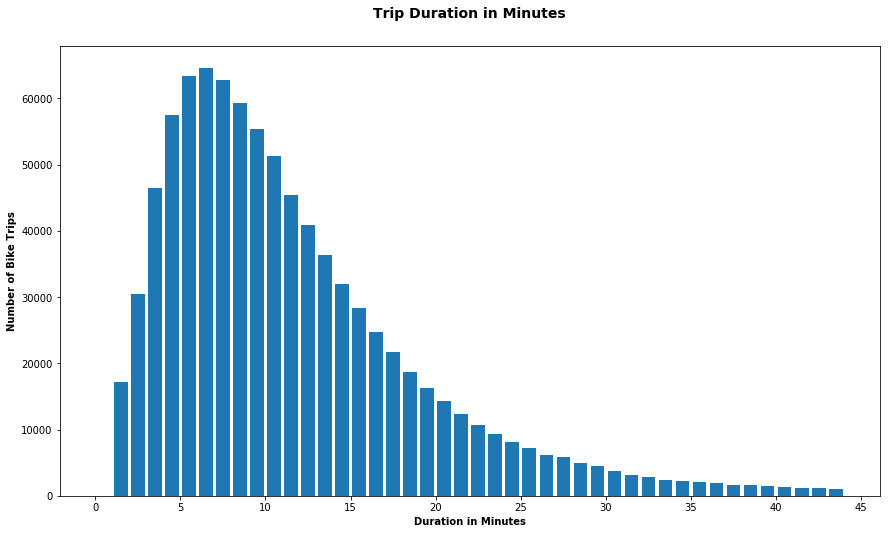

In [5]:
# Duration of the bike rides -in MINUTES
plt.figure(figsize=[14.70, 8.27])
bin_edges = np.arange(0, 45, 1) # Changed axis limit to see the shape where most data points lie.
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_2020, x = 'duration_minutes', bins = bin_edges, rwidth = 0.8);
plt.title('Trip Duration in Minutes', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration in Minutes', fontweight='bold')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips', fontweight='bold');

An average ride duration lies in the 3-14 minute range.

In [73]:
# When are most trips taken in terms of month of the year

df_2020.month.value_counts()

February    432353
January     295853
March       176798
Name: month, dtype: int64

In [76]:
df_2020.month.describe()

count       905004
unique           3
top       February
freq        432353
Name: month, dtype: object

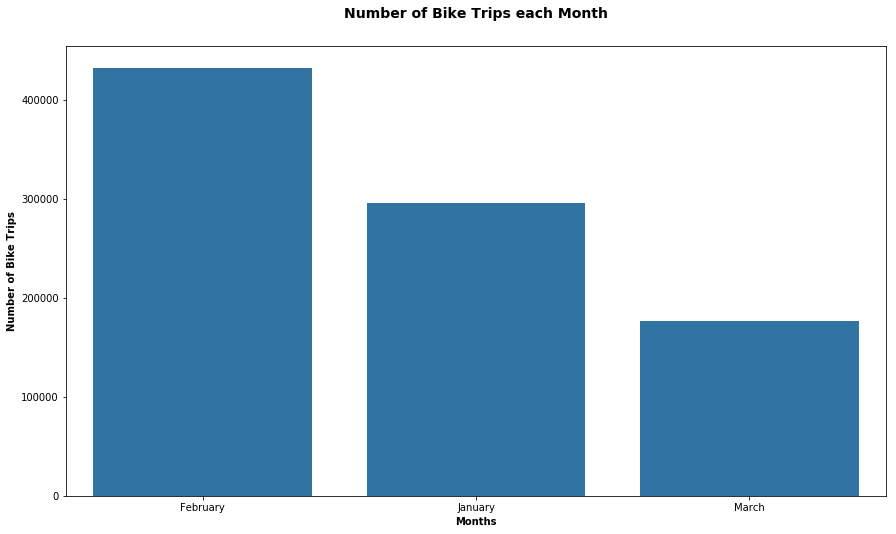

In [4]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
month_order = df_2020['month'].value_counts().index
sb.countplot(data = df_2020, x = 'month', color = base_color, order = month_order)
plt.title('Number of Bike Trips each Month', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Number of Bike Trips', fontweight='bold');

Most trips are taken in February.

In [71]:
# When are most trips taken in terms of day of the week

df_2020.start_day.value_counts()

Wednesday    148956
Thursday     144250
Friday       143956
Tuesday      137841
Monday       130761
Saturday     100371
Sunday        98869
Name: start_day, dtype: int64

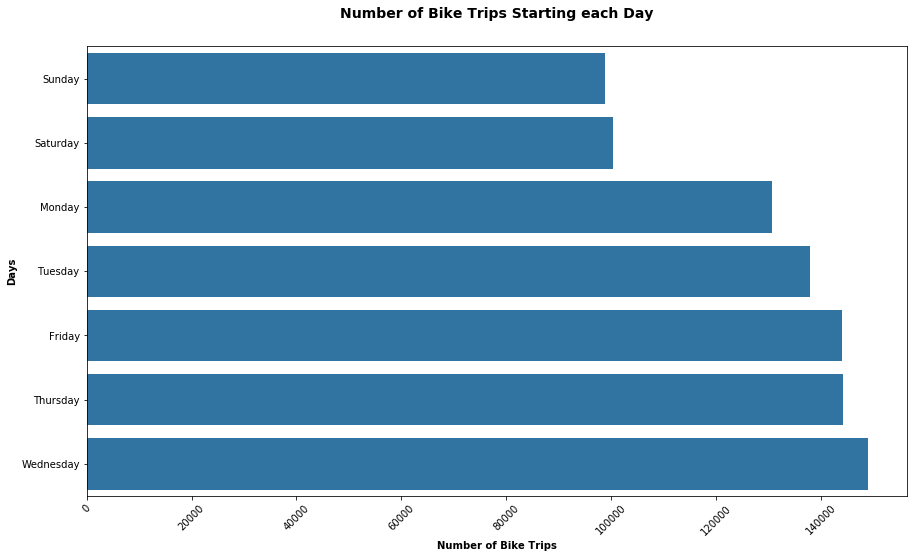

In [6]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
startDay_order = df_2020['start_day'].value_counts(ascending=True).index # to reverse order
sb.countplot(data = df_2020, y = 'start_day', color = base_color, order = startDay_order)
plt.title('Number of Bike Trips Starting each Day', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('Days', fontweight='bold')
plt.xlabel('Number of Bike Trips', fontweight='bold')
plt.xticks(rotation = 45);

Most trips were taken on Wednesday.

In [72]:
#When did most trips end in terms of day of the week,

df_2020.end_day.value_counts()

Wednesday    148948
Thursday     144225
Friday       143773
Tuesday      137819
Monday       130776
Saturday     100423
Sunday        99040
Name: end_day, dtype: int64

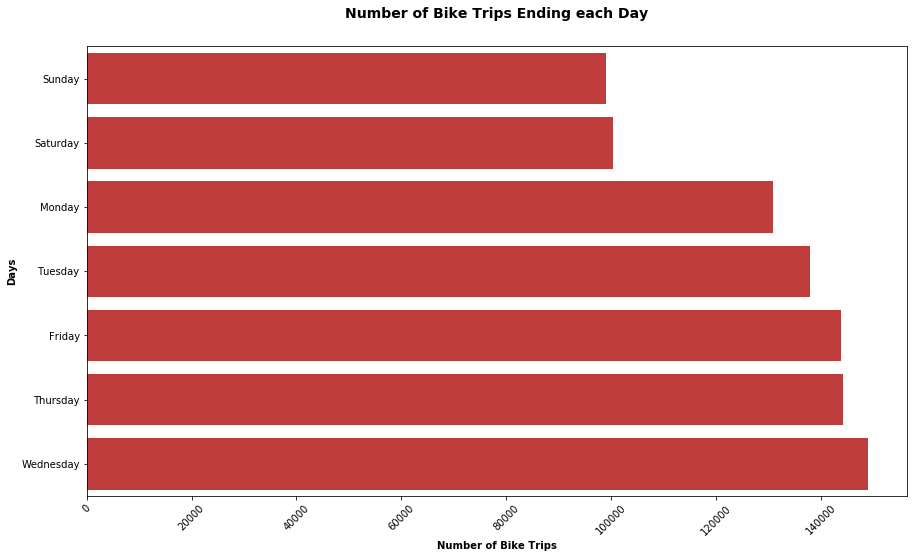

In [7]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[3]
startDay_order = df_2020['end_day'].value_counts(ascending=True).index # to reverse order
sb.countplot(data = df_2020, y = 'end_day', color = base_color, order = startDay_order)
plt.title('Number of Bike Trips Ending each Day', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('Days', fontweight='bold')
plt.xlabel('Number of Bike Trips', fontweight='bold')
plt.xticks(rotation = 45);

Most trips ended on Wednesday.

 <a id='bivariate'></a>
 #### ii. Bivariate Exploration

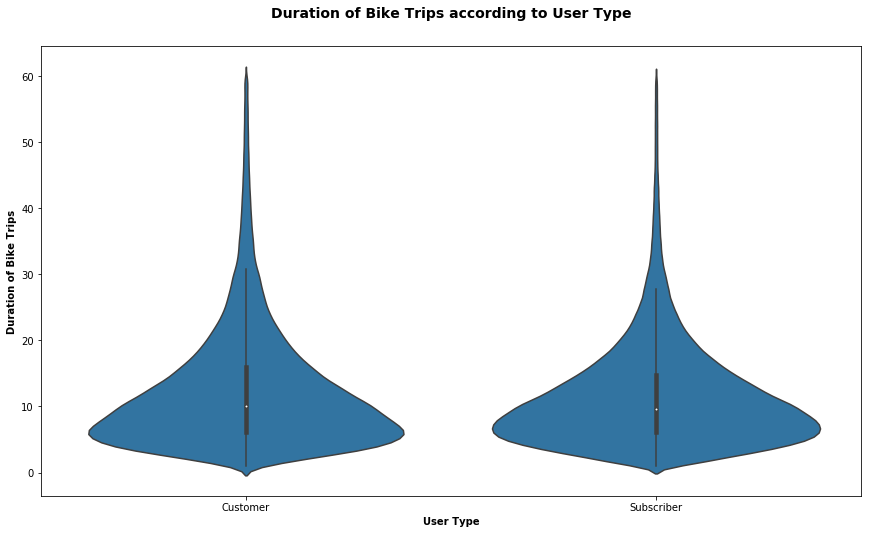

In [8]:
# Does trip duration depend on user type?

plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data = df_2020.query("duration_minutes <= 60"),x = 'user_type',y='duration_minutes',color = sb.color_palette()[0])
plt.title('Duration of Bike Trips according to User Type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('User Type', fontweight='bold')
plt.ylabel('Duration of Bike Trips', fontweight='bold');

At durations less than or equal to 60 minutes, both customers (casual) and subscribers (members) have achieved similar duartions of use.

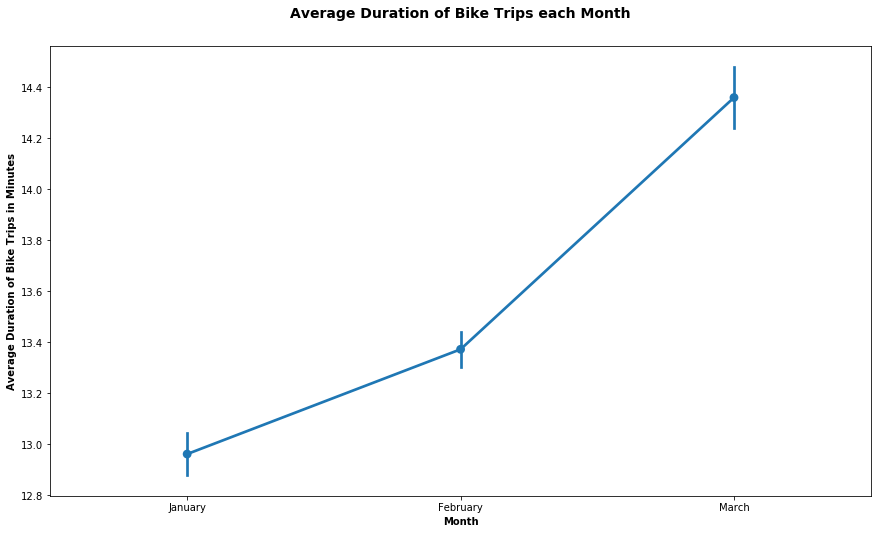

In [9]:
# duration min against month

plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
sb.pointplot(data = df_2020, x = 'month', y = 'duration_minutes', color = base_color)
plt.title('Average Duration of Bike Trips each Month', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Average Duration of Bike Trips in Minutes', fontweight='bold');

Average Trip duration has been increasing since Jan 2020 and reached it's peak in March.

 <a id='multivariate'></a>
 #### iii. Multivariate Exploration

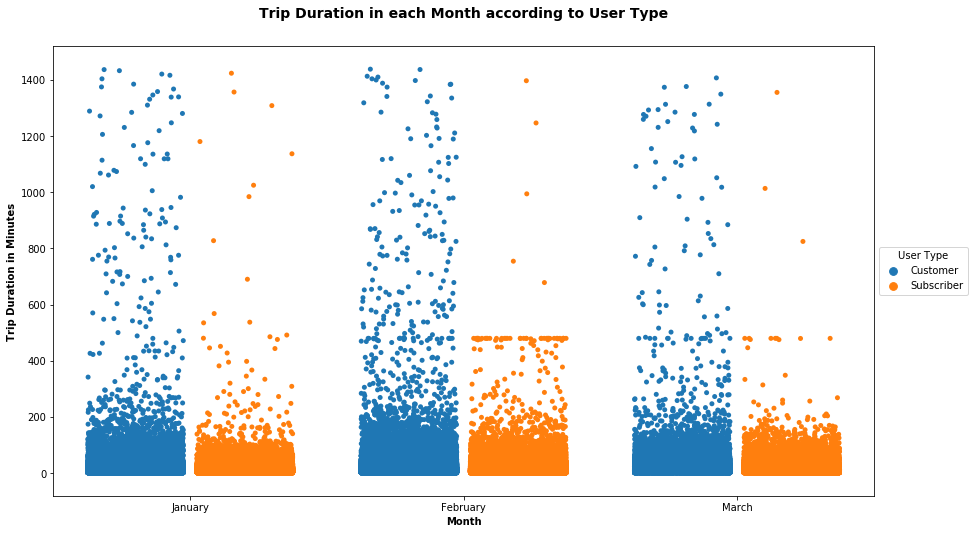

In [56]:
# scatterplot - duration and month - by user type

plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df_2020, x = 'month', y = 'duration_minutes', hue = 'user_type',
jitter = 0.35, dodge = True)
plt.legend(loc= 'center left', bbox_to_anchor = (1, 0.5), title = 'User Type')
plt.title('Trip Duration in each Month according to User Type', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Trip Duration in Minutes', fontweight='bold');

When viewed by Month, without setting a duration limit, the plot shows that some customers had longer trip durations than subscribers.

 <a id='explanatory'></a>
 ### B. Explanatory Data Analysis
 Most important findinngs can be viewed in the accompanying slides